# Lecture 14: Multivariate Data

```{note}
In the first few lectures of this course, we explored measures of location, dispersion, and shape to communicate the characteristics of the single variable data. In this lecture, we will explore means of communicating characteristics of multivariate data.
```

---

## Introduction

Multivariate data involves making two or more measurements per entity. For instance, the 2024 Indian Time Use Survey captures gender, age, marital status, education level, and employment status, among other identifier variables (NSS region, district, stratum, sub-stratum, etc.), for each individual. Further, the 2024 Indian Time Use Survey captures household size, religion, social group, land possesed, and monthly expenditure, among others including identifier variables (NSS region, district, stratum, sub-stratum, etc.), for each household.

In [3]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
options(repr.plot.width = 12, repr.plot.height = 8)

# 2024 ITUS Individual Data (processed)
url  <- "https://raw.githubusercontent.com/anmpahwa/CE5540/refs/heads/main/resources/ITUS_IND_DT.csv"
data <- read.csv(url)                           # Loading Data
str(data)                                       # Data Structure

'data.frame':	454192 obs. of  22 variables:
 $ Unique_ID          : chr  "2024-30010-1-241-17-13-11-2-2420-4-1-1" "2024-30010-1-241-17-13-11-2-2420-4-10-1" "2024-30010-1-241-17-13-11-2-2420-4-10-2" "2024-30010-1-241-17-13-11-2-2420-4-11-1" ...
 $ Unique_HH_ID       : chr  "2024-30010-1-241-17-13-11-2-2420-4-1" "2024-30010-1-241-17-13-11-2-2420-4-10" "2024-30010-1-241-17-13-11-2-2420-4-10" "2024-30010-1-241-17-13-11-2-2420-4-11" ...
 $ time_of_year       : int  2 2 2 2 2 2 2 2 2 2 ...
 $ day_of_week        : int  2 2 2 6 6 6 6 6 1 1 ...
 $ sector             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ region             : int  2 2 2 2 2 2 2 2 2 2 ...
 $ district_population: int  1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 ...
 $ gender             : int  1 1 2 1 2 1 2 2 1 2 ...
 $ age                : int  45 28 25 45 43 17 21 18 45 42 ...
 $ marital_status     : int  1 2 2 2 2 1 1 1 2 2 ...
 $ education_level    : int  11 5 4 5 1 6 4 6 1 4 ...
 $ employment_st

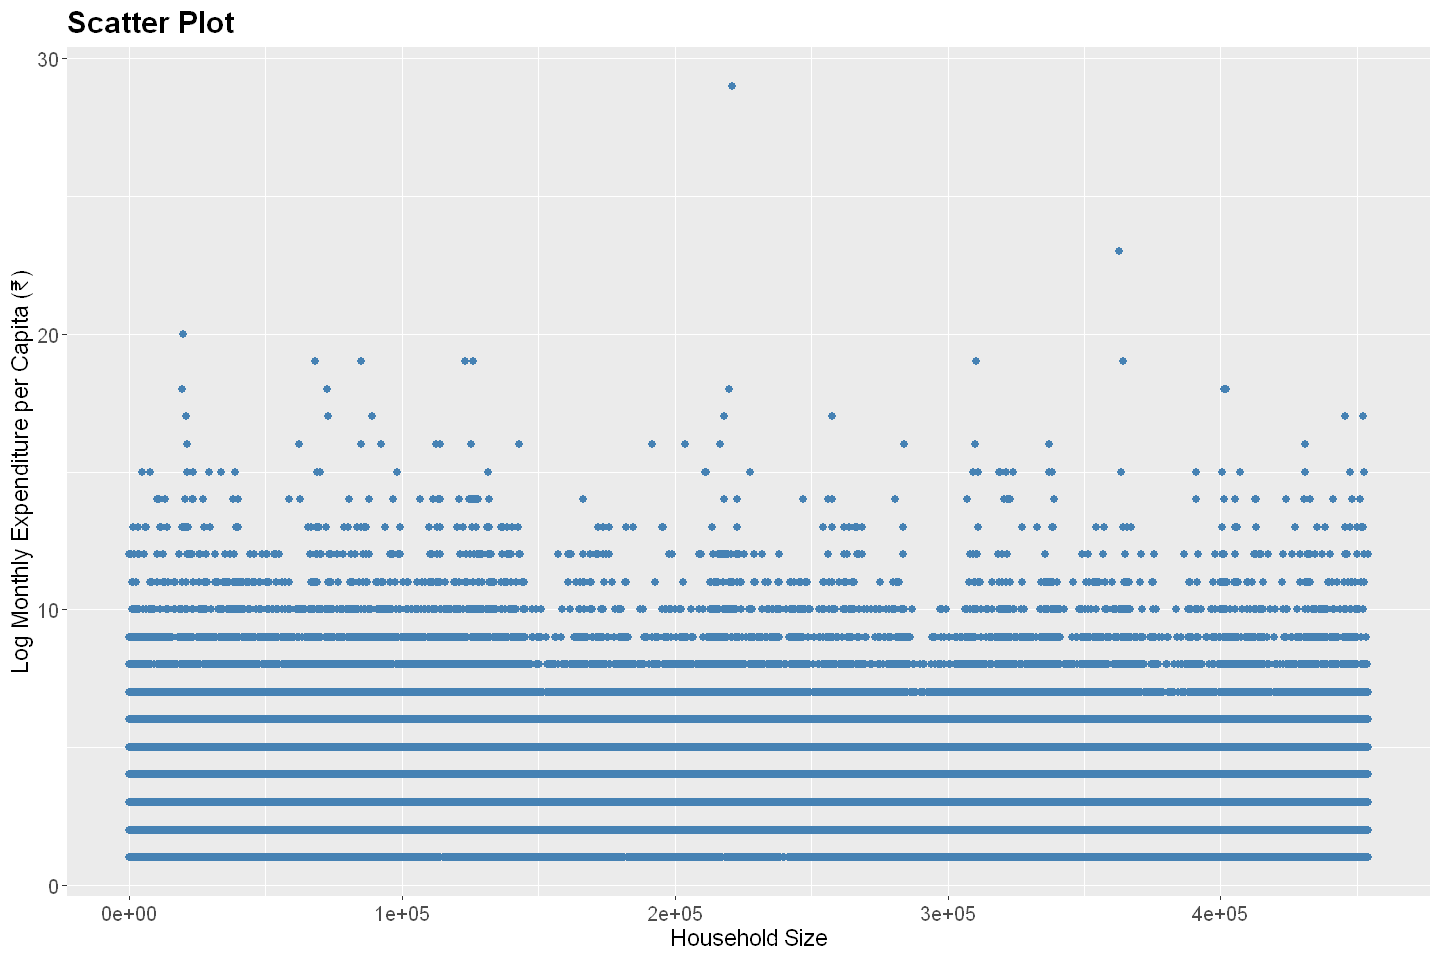

In [4]:
# Scatter Plot for Household Size
ggplot(data, aes(x = seq_along(Unique_ID), y = household_size)) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Scatter Plot",
    x = "Household Size",
    y = "Log Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

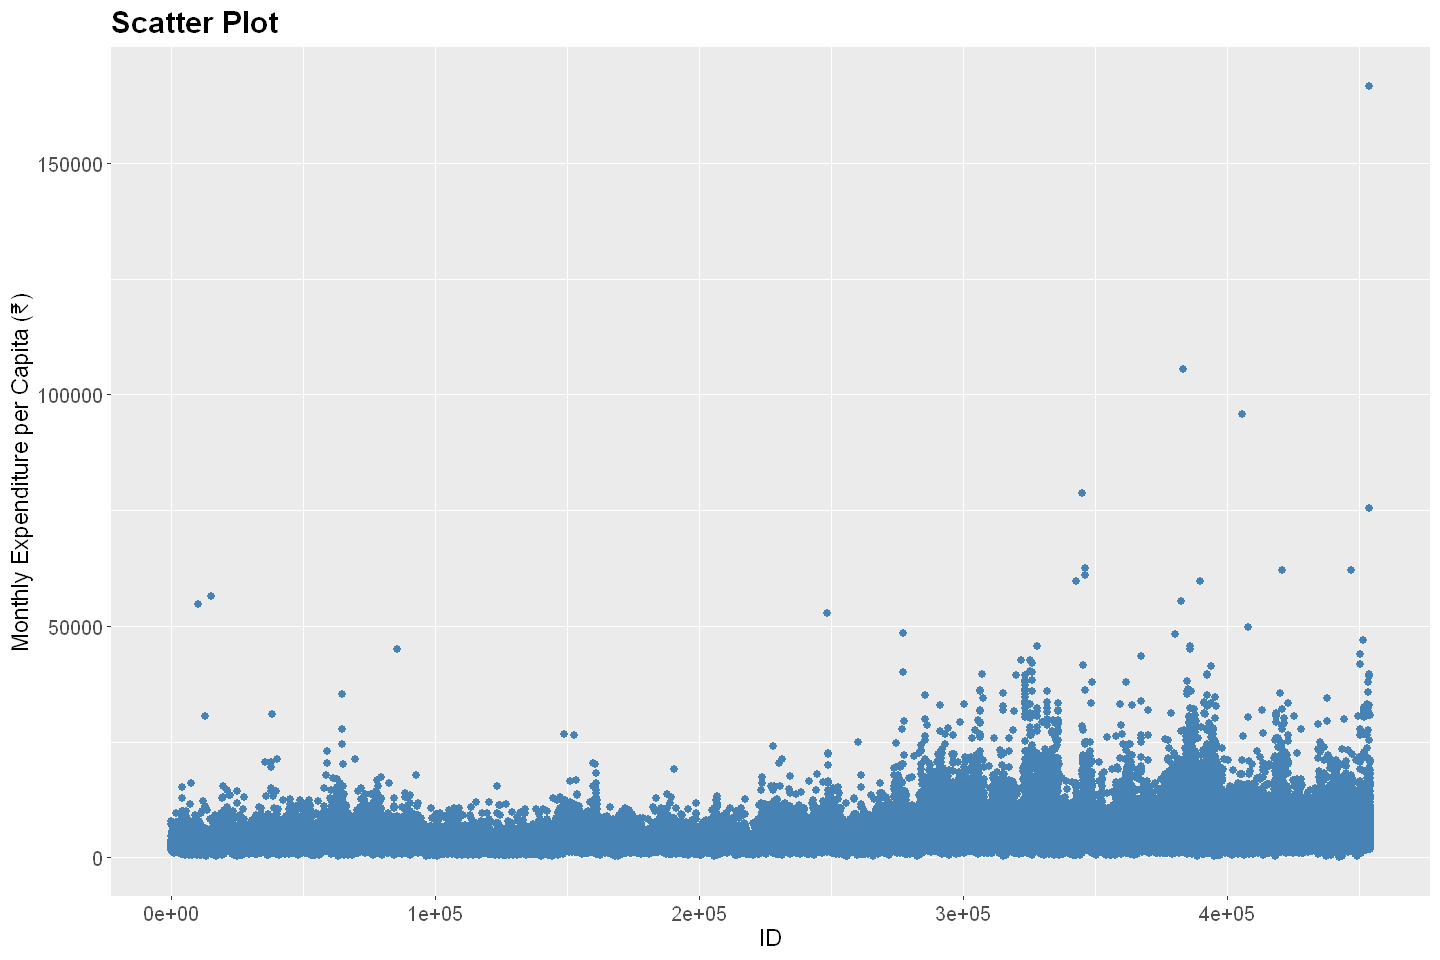

In [48]:
# Scatter Plot for Monthly Expenditure per Capita (₹)
ggplot(data, aes(x = seq_along(Unique_ID), y = total_expenditure / household_size)) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Scatter Plot",
    x = "ID",
    y = "Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

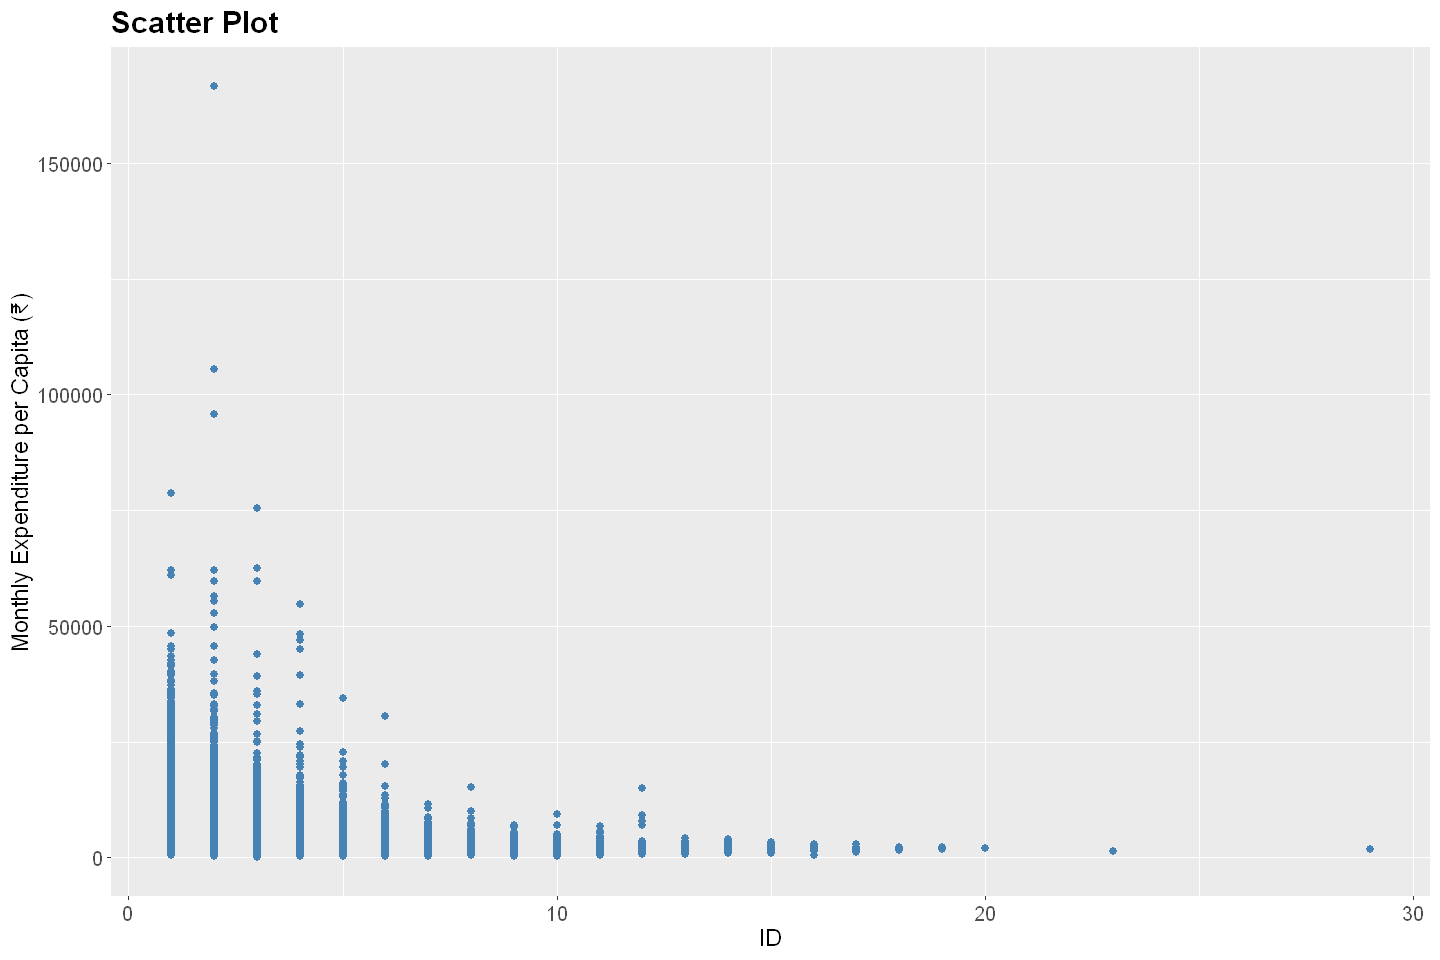

In [49]:
# Scatter plot for Monthly Expenditure per Capita vs. Household Size
ggplot(data, aes(x = household_size, y = total_expenditure / household_size)) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Scatter Plot",
    x = "ID",
    y = "Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

**Test Yourself**

Through these scatter plots, answer the following questions,

1. What is the largest household size?

<form id="Q1">
  <label><input type="radio" name="q1" value="a" onchange="checkRadioQ1()"> 23 </label><br>
  <label><input type="radio" name="q1" value="b" onchange="checkRadioQ1()"> 29 </label><br>
  <label><input type="radio" name="q1" value="c" onchange="checkRadioQ1()"> 20 </label><br>
  <label><input type="radio" name="q1" value="d" onchange="checkRadioQ1()"> 19 </label><br>
</form>
<p id="feedbackQ1"></p>
<script>
function checkRadioQ1() {
  const options = document.getElementsByName("q1");
  let selectedValue = "";
  for (const option of options) {
    if (option.checked) {
      selectedValue = option.value;
      break;
    }
  }
  const feedback = document.getElementById("feedbackQ1");
  if (selectedValue === "b") {
    feedback.innerHTML = "✅ Correct!";
  } else {
    feedback.innerHTML = "❌ Incorrect.";
  }
}
</script>

2. What is the highest monthly expenditure per capita?

<form id="Q2">
  <label><input type="radio" name="q2" value="a" onchange="checkRadioQ2()"> 18k </label><br>
  <label><input type="radio" name="q2" value="b" onchange="checkRadioQ2()"> 11k </label><br>
  <label><input type="radio" name="q2" value="c" onchange="checkRadioQ2()"> 16k </label><br>
  <label><input type="radio" name="q2" value="d" onchange="checkRadioQ2()"> 20k </label><br>
</form>
<p id="feedbackQ2"></p>
<script>
function checkRadioQ1() {
  const options = document.getElementsByName("q2");
  let selectedValue = "";
  for (const option of options) {
    if (option.checked) {
      selectedValue = option.value;
      break;
    }
  }
  const feedback = document.getElementById("feedbackQ2");
  if (selectedValue === "c") {
    feedback.innerHTML = "✅ Correct!";
  } else {
    feedback.innerHTML = "❌ Incorrect.";
  }
}
</script>

3. What is the highest monthly expenditure for a single-person household?

<form id="Q3">
  <label><input type="radio" name="q3" value="a" onchange="checkRadioQ3()"> 8k </label><br>
  <label><input type="radio" name="q3" value="b" onchange="checkRadioQ3()"> 5k </label><br>
  <label><input type="radio" name="q3" value="c" onchange="checkRadioQ3()"> 7k </label><br>
  <label><input type="radio" name="q3" value="d" onchange="checkRadioQ3()"> 9k </label><br>
</form>
<p id="feedbackQ3"></p>
<script>
function checkRadioQ1() {
  const options = document.getElementsByName("q3");
  let selectedValue = "";
  for (const option of options) {
    if (option.checked) {
      selectedValue = option.value;
      break;
    }
  }
  const feedback = document.getElementById("feedbackQ3");
  if (selectedValue === "a") {
    feedback.innerHTML = "✅ Correct!";
  } else {
    feedback.innerHTML = "❌ Incorrect.";
  }
}
</script>

---

In addition to rudimentary exploratory analysis, these scatter plots can also help identify,

## Linearity and Non-linearity

Linearity refers to the situation where the relationship between the predictor variable $X$ and the response variable $Y$ can be well approximated by a straight line. In a scatter plot, this appears as a cloud of points roughly forming a linear trend. Linear relationships are foundational in many statistical models, including simple and multiple linear regression. Non-linearity, on the other hand, occurs when the relationship between $X$ and $Y$ cannot be captured adequately by a straight line. This could manifest as curves, exponential growth or decay, plateaus, or other complex patterns. Identifying non-linearity is essential because applying a linear model to non-linear data can lead to biased estimates and misleading inferences. Techniques such as polynomial regression, splines, or transformation of variables are often used to handle non-linearity.

## Homoscedasticity and Heteroscedasticity

Homoscedasticity describes a scenario in which the variability of the response variable $Y$ remains constant across all levels of the predictor $X$. In graphical terms, if you draw vertical slices through a scatter plot, the spread of the Y-values should be roughly equal across these slices. Homoscedasticity is a key assumption in linear regression, as violations can lead to inefficient estimates and invalid standard errors. In contrast, heteroscedasticity occurs when the variance of $Y$ changes with $X$ — for example, increasing or decreasing as $X$ increases. This fan-shaped or funnel-shaped pattern in a scatter plot signals heteroscedasticity. It often arises in income data, where higher-income groups tend to show greater variation in expenditure, for instance. If present, robust regression methods or variance-stabilizing transformations may be required.

## Outliers

Outliers are observations that lie far from the general pattern of the data. They can arise due to data entry errors, measurement anomalies, or genuine variability in the population. Statistically, outliers are often defined as points lying more than 1.5 times the interquartile range (IQR) from the quartiles, or several standard deviations away from the mean. Outliers can have a disproportionate influence on model estimates, especially in methods like least squares regression, which are sensitive to extreme values. While not all outliers are problematic, their presence should prompt further investigation — they might reveal interesting phenomena, data quality issues, or the need for robust modeling techniques that down-weight their influence.

---

**Test Yourself**

1. The relation between household size and monthly expenditure per capita is linear.

<form id="Q1">
  <label><input type="radio" name="q1" value="a" onchange="checkRadioQ1()"> True </label><br>
  <label><input type="radio" name="q1" value="b" onchange="checkRadioQ1()"> False </label><br>
</form>
<p id="feedbackQ1"></p>
<script>
function checkRadioQ1() {
  const options = document.getElementsByName("q1");
  let selectedValue = "";
  for (const option of options) {
    if (option.checked) {
      selectedValue = option.value;
      break;
    }
  }
  const feedback = document.getElementById("feedbackQ1");
  if (selectedValue === "b") {
    feedback.innerHTML = "✅ Correct!";
  } else {
    feedback.innerHTML = "❌ Incorrect.";
  }
}
</script>

2. The monthly expenditure per capita is heteroscedastic with respect to household size.

<form id="Q2">
  <label><input type="radio" name="q2" value="a" onchange="checkRadioQ2()"> True </label><br>
  <label><input type="radio" name="q2" value="b" onchange="checkRadioQ2()"> False </label><br>
</form>
<p id="feedbackQ2"></p>
<script>
function checkRadioQ1() {
  const options = document.getElementsByName("q2");
  let selectedValue = "";
  for (const option of options) {
    if (option.checked) {
      selectedValue = option.value;
      break;
    }
  }
  const feedback = document.getElementById("feedbackQ2");
  if (selectedValue === "a") {
    feedback.innerHTML = "✅ Correct!";
  } else {
    feedback.innerHTML = "❌ Incorrect.";
  }
}
</script>

3. The monthly expenditure per capita contains outliers.

<form id="Q3">
  <label><input type="radio" name="q3" value="a" onchange="checkRadioQ3()"> True </label><br>
  <label><input type="radio" name="q3" value="b" onchange="checkRadioQ3()"> False </label><br>
</form>
<p id="feedbackQ3"></p>
<script>
function checkRadioQ1() {
  const options = document.getElementsByName("q3");
  let selectedValue = "";
  for (const option of options) {
    if (option.checked) {
      selectedValue = option.value;
      break;
    }
  }
  const feedback = document.getElementById("feedbackQ3");
  if (selectedValue === "a") {
    feedback.innerHTML = "✅ Correct!";
  } else {
    feedback.innerHTML = "❌ Incorrect.";
  }
}
</script>

```{tip}
In the next few lectures, we will explore such visualization tools - a critical part of the analytical workflow, to uncover patterns and communicate insights more effectivey, particularly for multivariate data. These visual data summaries will enable us to detect trends and spot anomalies, serving as a foundation for more advanced data analysis.
```